# 신용평가모델 비즈니스평가

* 고객사는 ## 은행입니다. 신용평가 업무를 인공지능으로 전환하고자 여러분에게 모델링을 의뢰하였습니다.
* 대출업무는
    * 은행 창구에서 신청을 받고
    * 본사의 심사부서에서는 신용평가를 통해 대출 신청에 대한 승인 여부를 결정해 왔습니다.

* 현장의 요구
    * 경쟁사의 공격적인 대출상품 판매로, 본사에서는 자사 은행의 대출 실적이 줄어들고 있는 것에 부담을 느끼고 있습니다.
    * 그런데, 자사 은행에서는 신용평가 결과의 정확성에 의문을 품고 있으며, 신용평가 기준을 완화하여 가급적 대출승인 범위를 더 확대해 주기를 요구합니다.

* 신용평가 업무를 인공지능으로 전환
    * 현장의 요구를 감안하여, 과거 사람이 하던 평가방식을 개선하고자 인공지능에 의한 예측 모델을 만들고, 정확도를 높이고자 합니다.
-----------------
* 이제 인공지능에 의한 신용평가 시스템은 큰 무리 없이 작동하며 한 달여 운영되어 오고 있습니다. 한 달 동안의 운영 보고서를 작성해야 할 시점입니다.

* 그런데, 인공지능 신용평가 시스템에 대해 처음부터 부정적인 견해를 가져온 고객사 임원이, 심사 기간 단축 말고 구체적으로 **어떤 비즈니스 성과를 가져다 줄 것인지**를 설명해 달라고 요구 해 왔습니다.

* 또 다시 여러분에게 미션이 주어졌습니다. 인공지능 모델을 어떻게 비즈니스 성과로 연결할 수 있을까요?
* 고객사의 과거자료를 검토하며 다음과 같이 대출 수익구조를 정리하게 되었습니다.
    * 제 때 대출이자와 원금을 상환하는 고객으로부터, 평균적으로 대출금의 약 4%(연) 이자 수익이 발생 되었습니다.
    * 제 때 상환하지 않는 고객으로 인해, 평균적으로 약 9%의 원금 손실(연)이 발생됩니다.
    * 평균 대출 금액은 약 3200달러, 평균 대출 기간은 2년 입니다.


# 라이브러리 불러오기 및 데이터 로드하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

path = './data/credit.csv'
data = pd.read_csv(path)
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|  
|	-----	|	-----	|	-----	|	-----	|  
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|  
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|  
|	CreditDuration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|  
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |  
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|  
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|  
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|  
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|  
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|  
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|  
|	Age	|	Age (years)	|	나이	|		|  
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|  
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|  
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|  
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|  
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|  


In [3]:
data['CreditAmount'].mean()

3271.248

In [4]:
data.shape

(1000, 17)

##### Target 변수 조회

1    700
0    300
Name: Creditability, dtype: int64
1    0.7
0    0.3
Name: Creditability, dtype: float64


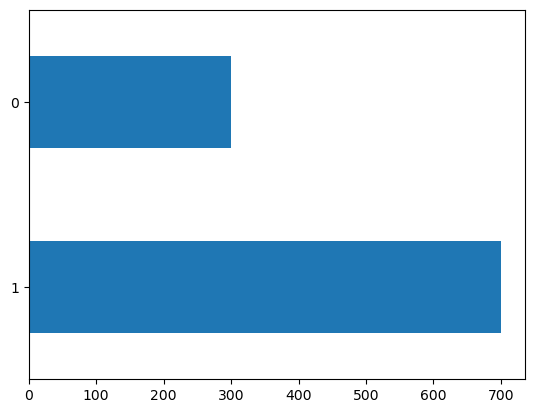

In [7]:
print(data['Creditability'].value_counts())
print(data['Creditability'].value_counts(normalize = True))

data['Creditability'].value_counts().plot(kind = 'barh')
plt.show()

# 데이터 준비하기

##### X,y 나누기

In [9]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

##### 가변수화

In [10]:
dummy_vars = ['SexMarital', 'MostValuableAsset','ForeignWorker','Telephone']

x = pd.get_dummies(x, columns = dummy_vars, drop_first = True)
x.head()

,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,CurrentAddress,Age,Apartment,CreditCount,Occupation,Dependents,SexMarital_2,SexMarital_3,SexMarital_4,MostValuableAsset_2,MostValuableAsset_3,MostValuableAsset_4,ForeignWorker_2,Telephone_2
0,3,24,2,0,1249,2,2,28,2,1,3,1,0,0,1,0,0,0,0,0
1,2,9,2,0,276,3,4,22,1,1,2,1,0,0,1,0,0,0,0,0
2,1,18,3,2,1049,2,4,21,1,1,3,1,1,0,0,1,0,0,0,0
3,1,24,3,1,6419,5,4,44,3,2,4,2,1,0,0,0,0,1,0,1
4,3,12,2,2,1424,5,4,55,2,1,4,1,1,0,0,0,0,0,0,1


##### train, validation 분할

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)

In [13]:
x_train.shape

(800, 20)

# 모델링

In [24]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

##### 모델 선언 및 학습

In [15]:
# 기본값으로 모델링
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##### 예측 및 평가

In [16]:
pred1 = model.predict(x_val)

In [17]:
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[[ 27  44]
 [ 14 115]]
              precision    recall  f1-score   support

           0       0.66      0.38      0.48        71
           1       0.72      0.89      0.80       129

    accuracy                           0.71       200
   macro avg       0.69      0.64      0.64       200
weighted avg       0.70      0.71      0.69       200



In [19]:
cm1 = confusion_matrix(y_val, pred1)
cm1

array([[ 27,  44],
       [ 14, 115]], dtype=int64)

# 비지니스 기대가치 평가

* 비즈니스 가치 matrix
    * 제 때 대출이자와 원금을 상환하는 고객으로부터, 평균적으로 대출금의 약 4%(연) 이자 수익이 발생 되었습니다.
    * 제 때 상환하지 않는 고객으로 인해, 평균적으로 약 9%의 원금 손실(연)이 발생됩니다.
    * 평균 대출 금액은 약 3200달러, 평균 대출 기간은 2년 입니다.

- 위 조건을 가지고 비지니스 matrix를 만들어보면, 아래와 같다  
    제 때 상환 경우   | Negative | Positive |  
    제 때 상환 x 경우 | 0 | -0.18 |  
    제 때 상환 o 경우 | 0 | 0.08 |  

In [27]:
bv = np.array([[0,-0.18],[0,0.08]])

In [28]:
bv

array([[ 0.  , -0.18],
       [ 0.  ,  0.08]])

* 모델의 성적표 (Confusion matrix)

In [29]:
cm1

array([[ 27,  44],
       [ 14, 115]], dtype=int64)

* 기대가치 계산하기

In [32]:
np.sum(cm1 * bv) * 3200

4096.000000000004

##### 1인당 비지니스 기대가치 계산

In [38]:
cm1_p = cm1 / np.sum(cm1)

np.sum(cm1_p * bv) * 3200

20.48000000000001

# 모델 개선하기

* 위에서 만든 모델보다 좀더 나은 모델을 만들어 보자.
* 다양한 모델을 만들어 보자. (최소 2개 이상)
    * 여러 알고리즘
    * 하이퍼파라미터 튜닝(GridSearchCV, RandomizedSearchCV)

### 1. decision tree

In [25]:
# DecisionTree 모델 생성
dt_model = DecisionTreeClassifier()


# Grid Search를 위한 params설정 및 모델 생성
params = {'max_depth':range(1,20)}

gs_dt_model = GridSearchCV(dt_model, params, cv=20)
gs_dt_model.fit(x_train, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)})

##### 예측 결과 및 평가

In [33]:
# 모델 예측
pred2 = gs_dt_model.predict(x_val)

# 모델 평가 메트릭스
cm2 = confusion_matrix(y_val, pred2)

##### 비지니스 기대가치 계산하기

In [34]:
np.sum(cm2 * bv) * 3200

2624.0000000000036

##### 1인당 비지니스 기대가치 계산

In [37]:
cm2_p = cm2/ np.sum(cm2)

np.sum(cm2_p * bv) * 3200

13.12000000000002

### 2. XGBoost

In [20]:
# XGBoost 모델 생성
xgb_model = XGBClassifier()

# Grid Search를 위한 params설정 및 모델 생성
params = {'max_depth':range(1,8,2), 
          'learning_rate':[0.01, 0.05, 0.1, 0.2], 
          'n_estimators':range(50,151,20)}

GS_XGB_model = GridSearchCV(xgb_model, params, cv=5)
GS_XGB_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': range(1, 8, 2),
                         'n_estimators': range(50, 151, 20)})

##### 예측 결과 및 평가

In [35]:
# 모델 예측
pred3 = gs_dt_model.predict(x_val)

# 모델 평가 메트릭스
cm3 = confusion_matrix(y_val, pred3)

##### 비지니스 기대가치 계산하기

In [36]:
np.sum(cm3 * bv) * 3200

2624.0000000000036

##### 1인당 비지니스 기대가치 계산

In [39]:
cm3_p = cm3 / np.sum(cm3)

np.sum(cm3_p * bv) * 3200

13.12000000000002